In [1]:
using LinearAlgebra
using Plots

In [2]:
function Rouse_Hamiltonian(r,R_e=1)
    N=length(r[:,1])
    H=0
    for i in 2:N
        H+=3*(N-1)/2*norm(r[i]-r[i-1])^2
    end    
    return H
end

function gauss(x,sigma=1,mu=0)
    return 1/sqrt(2*pi*sigma^2)*exp(-(x-mu)^2/2/sigma^2)
end

function metropolis_step(r1,r2,H)
    p=exp(H(r1)-H(r2))
    x=rand()
    if x<p
        r1=r2
    end    
    return r1    
end

function make_chain(N=64)
    r=zeros(N,3)
    
    for i in 2:N
        x,y,z=2*rand()-1,2*rand()-1,2*rand()-1        
        l=sqrt(x^2+y^2+z^2)
        l=sqrt(N-1)
        r2=[r[i-1,1]+x/l,r[i-1,2]+y/l,r[i-1,3]+z/l]
        r[i,:]=r2
    end                
    return r
end
    
    
function displace_chain(r)
    N=length(r[:,1])
    i =rand(1:N)
    l=sqrt(N-1)
    x,y,z=2*rand()-1,2*rand()-1,2*rand()-1
    r2=[r[i,1]+x/l,r[i,2]+y/l,r[i,3]+z/l]
    r[i,:]=r2
    return r
end
    
function evolve_rouse(r)
    N=length(r[:,1])
    H=Rouse_Hamiltonian
    for i in 1:N
        r2=displace_chain(r)
        r=metropolis_step(r,r2,H)
    end                        
    return r 
end        

evolve_rouse (generic function with 1 method)

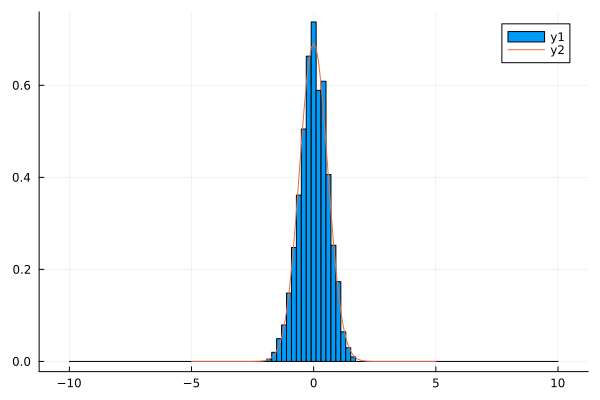

In [3]:
end2end=zeros(1000)
for i in 1:1000
    R=make_chain(64)
    end2end[i]=(R[1,1]-R[64,1])
end

histogram(end2end ,normalize=:pdf,bins=range(-10,10,100)) 

x=-5:0.1:5
y=gauss.(x,1/sqrt(3))
plot!(x,y)


64.0

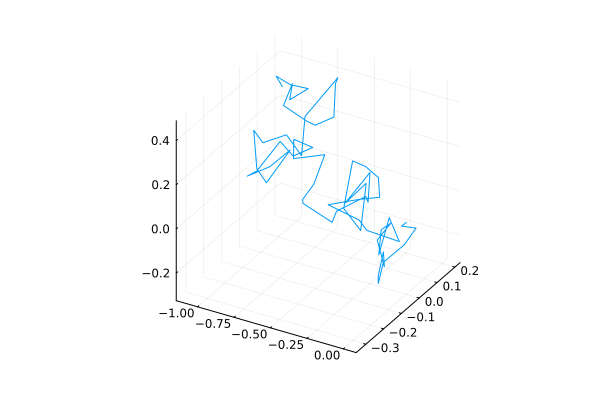

In [4]:
R=make_chain(64)
print(length(R)/3)
#display(R)

plot3d(R[:,1],R[:,2],R[:,3],label=:none)

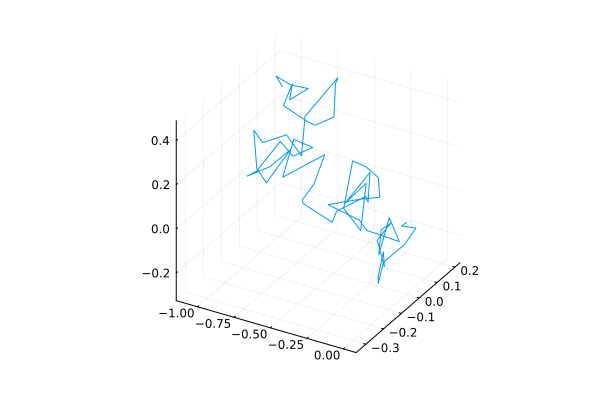

In [5]:
R=displace_chain(R)
plot3d(R[:,1],R[:,2],R[:,3],label=:none)

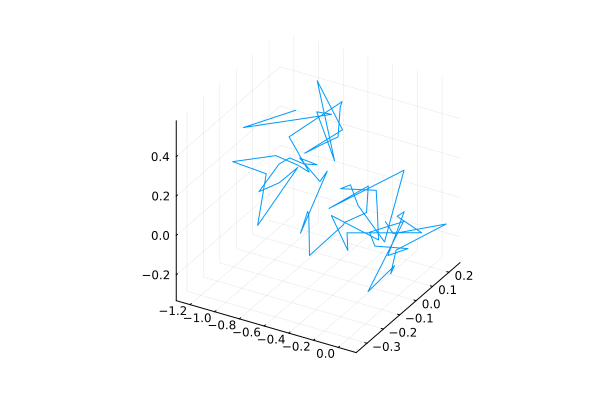

In [6]:
R=evolve_rouse(R)
plot3d(R[:,1],R[:,2],R[:,3],label=:none)

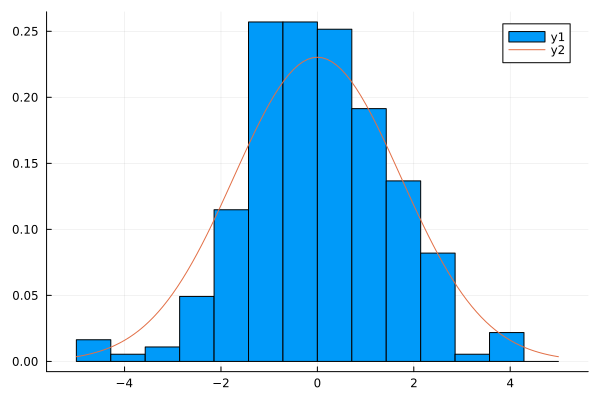

In [7]:
M=256
hist_endtoend=zeros(M,3)

for i in 1:M
    R=make_chain(64)
    
    for j in 1:200
        R=evolve_rouse(R)
    end 
    
    endtoend=(R[64,:]-R[1,:])
    hist_endtoend[i,:]=endtoend
end




histogram(hist_endtoend[:,1] ,normalize=:pdf,bins=range(-5,5,15))
x=-5:0.1:5
y=gauss.(x,sqrt(3))
plot!(x,y)

In [8]:
function structure_factor(q,r)
    s=0
    N=length(r[:,1])
    
    for i in 1:N
        x,y,z=2*rand()-1,2*rand()-1,2*rand()-1        
        l=sqrt(x^2+y^2+z^2)
        s+=exp.(1im*dot([q*x/l,q*y/l,q*z/l],r[i,:]))
    end    
    return 1/N*abs(s)^2
end


q=10 .^(range(-2,stop=2,length=30))
S=zeros(length(q))

for k in 1:length(q)
    for i in 1:M
        R=make_chain(64)
    
        for j in 1:40
            R=evolve_rouse(R)
        end 
        S[k]+=1/M*structure_factor(q[k],R)
    end
end

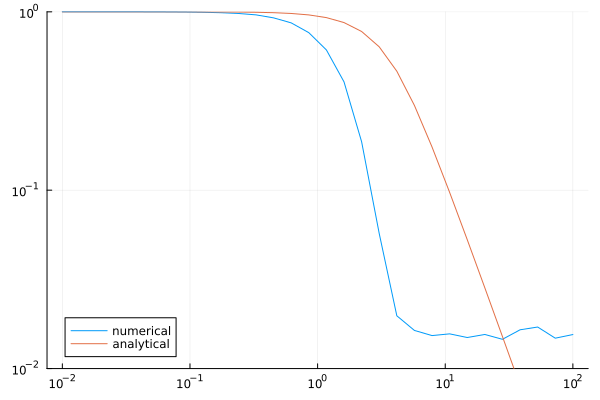

In [9]:
function analytic_structure(x)
    b=x^2/6
    return 2/b^2*(exp(-b)-1+b)
end

function long(x)
    b=x^2/(6)
    return 2/b
end

function short(x)
    b=x^2/6
    return 1-b/3
end


plot(q,S/64,label=:"numerical")
plot!(xscale=:log10,yscale=:log10)
plot!(q,analytic_structure.(q),label=:"analytical",legend=:bottomleft,ylimits=(0.01,1))

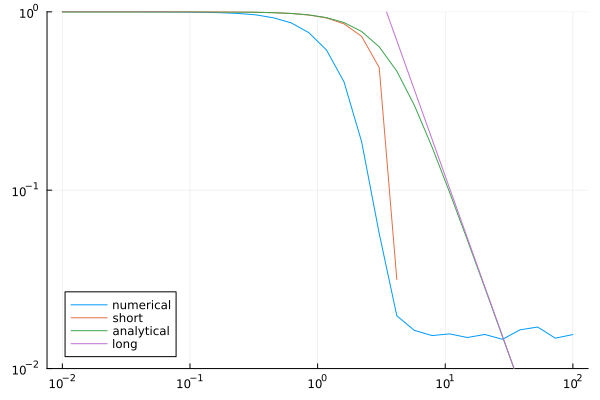

In [10]:
plot(q,S/64,label=:"numerical")
plot!(xscale=:log10,yscale=:log10)
plot!(q,short.(q),label=:"short")
plot!(q,analytic_structure.(q),label=:"analytical")
plot!(q, long.(q),label=:"long",legend=:bottomleft,ylimits=(0.01,1))

In [11]:
N=64
T=400
M=256
g3=zeros(T)
g1=zeros(T)


for i in 1:M
    R0=make_chain(64)
    R=copy(R0)
    Rcm0=zeros(3)
    
    for o in 1:3    
        Rcm0[o]=1/N*sum(R0[:,o])  
    end    
        
    for j in 1:T
        Rcm=zeros(3)
        R=evolve_rouse(R)
        
        for o in 1:3    
            Rcm[o]=1/N*sum(R[:,o])  
        end
        
        g3[j]+=1/M*norm(Rcm-Rcm0)^2
        
        for o in 1:64
            g1[j]+=1/M*1/N*norm(R[o,:]-R0[o,:])^2
        end 
    end

end

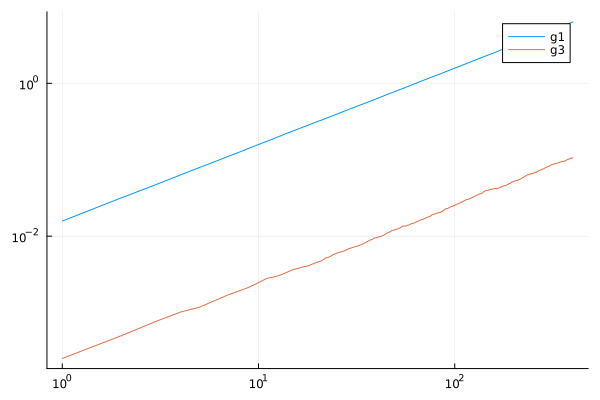

In [12]:
plot(g1,label=:"g1")
plot!(g3,label=:"g3")
plot!(yscale=:log10,xscale=:log10)


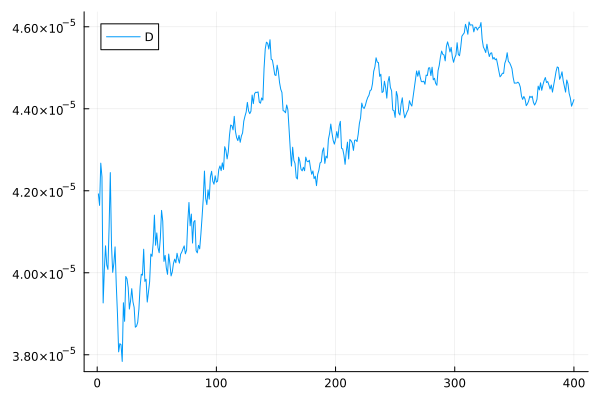

In [13]:
G=[g3[i]/(6*i) for i in 1:length(g3)]
plot(G,label=:"D")
#plot!(yscale=:log10)


In [14]:
N=64
T=2000
M=256
g3_lim=zeros(T)



for i in 1:M
    R0=make_chain(64)
    R=copy(R0)
    Rcm0=zeros(3)
    
    for o in 1:3    
        Rcm0[o]=1/N*sum(R0[:,o])  
    end    
        
    for j in 1:T
        Rcm=zeros(3)
        R=evolve_rouse(R)
        
        for o in 1:3    
            Rcm[o]=1/N*sum(R[:,o])  
        end
        
        g3_lim[j]+=1/M*norm(Rcm-Rcm0)^2
        
        
    end

end

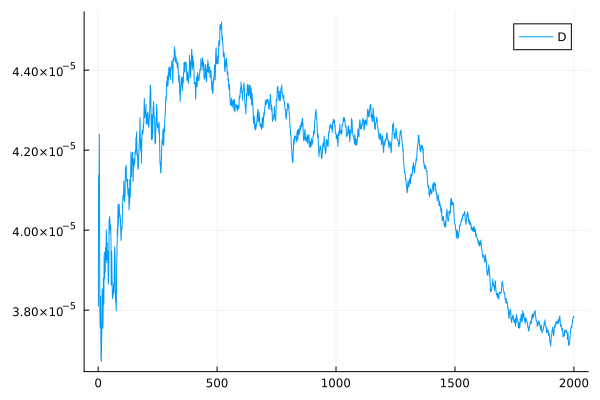

In [15]:
G=[g3_lim[i]/(6*i) for i in 1:length(g3_lim)]
plot(G,label=:"D")

In [16]:
#2.2

function weight_sliplink(r,links,A,beta=0.5)
    N=length(r[:,1])

    Z=length(links[:,1])
    sumN=0
    sumZ=0
    prod=1
    for i in 2:N
        sumN+=3*(N-1)/2*norm(r[i]-r[i-1])^2
    end
    for i in 1:Z 
        if any(links.==0)
            print("Oh no")
        end
        sumZ+=beta*norm(r[links[i][1]]-A[i])^2
        for j in 1:Z
            if links[i][1]==links[j][1]
                prod=0
             end  
        end    
    end

    return exp(-sumN-sumZ)*prod
end
    

        
    
function displace_sliplink(r)
    N=length(r[:,1])
    i =rand(1:N)
    l=sqrt(N-1)
    x,y,z=2*rand()-1,2*rand()-1,2*rand()-1
    r2=[r[i,1]+x/l,r[i,2]+y/l,r[i,3]+z/l]
    r[i,:]=r2
    return r
end
    
function tube_renewal(r,links2,A,beta=0.5)
    stdv=1/sqrt(3*(N-1)*beta/2)
    H1=weight_sliplink(r,links2,A)
    new_link=rand([1,N])
    links3=copy(links2)
    A2=copy(A)
    if any(new_link==links2[:,1])            
        new_link+=N-1
        new_link=new_link%(2*N-1)+1            
    end    
       
    new_a=[0.,0.,0.]   
        
    for j in 1:3
        new_a[j]=stdv*randn()+r[new_link,j]
    end 
   
    free_beads=collect(1:N)
     
    for o in links2[:,1]
        deleteat!(free_beads, findall(x->x==o,free_beads))
    end        
               
    partner=rand(free_beads) 
    vcat(A2,new_a')
    vcat(links3,[new_link,partner]')        
        
    new_a=[0.,0.,0.]
        
    for j in 1:3
        new_a[j]=stdv*randn()+r[partner,j]
    end
        
    vcat(links3,[partner,new_link]')
    vcat(A2,new_a')
    H2=weight_sliplink(r,links3,A2)  
    p=rand()    
    if p<H2/H1
        links2=links3
        A=A2
    end       
    
    return A,links3
end 

function evolve_sliplink(r,links,A,beta=0.5)
    N=length(r[:,1])

    for i in 1:N
       # print(" ",i," ")
        H1=weight_sliplink(r,links,A)
        Z=length(links[:,1])
        r2=displace_sliplink(r)
        H2=weight_sliplink(r2,links,A)  
        p=rand()
        if p<H2/H1
                r=r2
        end
        links2=copy(links)
        j =rand(1:Z) 
        links2[j,1]+=rand([-1,1])                 

        if links2[j,1]  == N+1 ||  links2[j,1]  == 0 
           # print("slip")
            links2=links2[1:end .!= j,:]       
            links2=links2[1:end .!= links[j,2],:]
            A,links2=tube_renewal(r,links2,A)             
        end
        H1=weight_sliplink(r2,links,A) 
        H2=weight_sliplink(r2,links2,A)
        p=rand()
        if p<H2/H1
            links=links2
        end    
        
    end
        
    return r,links,A  
end      
    

evolve_sliplink (generic function with 2 methods)

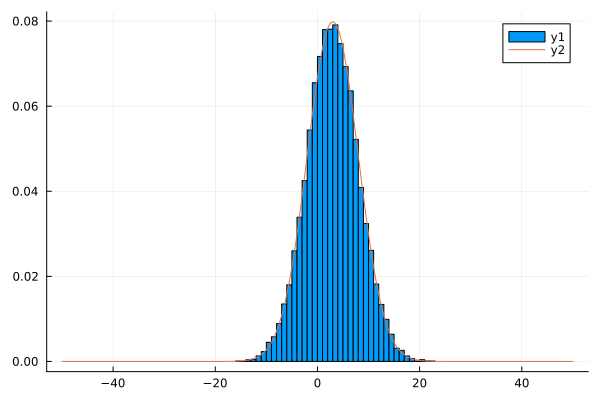

In [17]:
A=zeros(10000)
for i in 1:10000
    A[i]=5*randn()+3
end
histogram(A ,normalize=:pdf)

x=-50:0.1:50
y=gauss.(x,5,3)
plot!(x,y)


In [18]:
function make_chain_sliplink(N=64,beta=0.5)
    Z=round(Int,N/8)
    r=zeros(N,3)
    
    for i in 2:N
        x,y,z=2*rand()-1,2*rand()-1,2*rand()-1        
        l=sqrt(x^2+y^2+z^2)
        l=sqrt(N-1)
        r2=[r[i-1,1]+x/l,r[i-1,2]+y/l,r[i-1,3]+z/l]
        r[i,:]=r2
    end        
    stdv=1/sqrt(3*(N-1)*beta/2)
    links=Array{Any}(undef,2*Z,2)
    A=zeros(2*Z,3)
    free_beads=collect(1:N)
    for i in 1:Z     
        new_link=rand(free_beads)  
        #deleteat!(free_beads,new_link)
        deleteat!(free_beads, findall(x->x==new_link,free_beads))
        new_a=[0.,0.,0.]
        
        for j in 1:3
            new_a[j]=stdv*randn()+r[new_link,j]
        end
        A[2*i-1,:]=new_a
        partner=rand(free_beads) 
        deleteat!(free_beads, findall(x->x==partner,free_beads))
        links[2*i-1,:]=[new_link,partner]
        #new_a=Array{Any}(undef,3) 
        new_a=[0.,0.,0.]
        for j in 1:3
            new_a[j]=stdv*randn()+r[partner,j]
        end
        A[2*i,:]=new_a     
        links[2*i,:]=[partner,new_link]
    end 
    
    return r,links,A
end

make_chain_sliplink (generic function with 3 methods)

In [19]:
linkspolymer=make_chain_sliplink()
R=linkspolymer[1]
links=linkspolymer[2]
A=linkspolymer[3]

16×3 Matrix{Float64}:
  0.330121   0.173826    0.055411
 -0.0967435  0.442593    0.0914469
 -0.115219   0.102233    0.116962
  0.0954945  0.519681   -0.162852
  0.404852   0.423521   -0.33899
  0.366561   0.273658   -0.416919
  0.0243992  0.01058    -0.0914306
  0.215628   0.304403   -0.368422
 -0.0083654  0.159517    0.127038
  0.343073   0.471542   -0.370976
 -0.0589515  0.0628922  -0.0354705
 -0.106273   0.0455996  -0.0456938
  0.216182   0.10539    -0.118411
  0.270887   0.359801   -0.660263
  0.355874   0.444317   -0.14359
  0.141728   0.18258     0.345691

In [20]:
plot3d(R[:,1],R[:,2],R[:,3],label=:none)
A=Array{Any}(undef,length(links[:,1]),3)

for j in 1:3
    for i in 1:16
        A[i,j]=links[:,2][i][j]
    end
end


scatter!(A[:,1],A[:,2],A[:,3],label=:none)
       

LoadError: BoundsError

In [21]:
linkspolymer=make_chain_sliplink()
R=linkspolymer[1]
links=linkspolymer[2]
A=linkspolymer[3]
evolve_sliplink(R,links,A)

([0.0 0.0 0.0; 0.017773406283995916 -0.19519023361485904 0.21239381570778135; … ; -0.039062591640873806 0.5078401751527284 0.004004231198065193; -0.07276454142439691 0.6455543707746954 0.08162326896368689], Any[40 41; 41 40; … ; 57 52; 52 57], [-0.19315963380740475 0.46389722971407904 0.06664915169171046; -0.17036894965735713 0.4348129880935282 -0.128126479366865; … ; -0.03921144102615681 0.6605810642391307 0.09292046805762057; -0.22123283979348812 0.7872638424336643 0.08349465240143074])

In [80]:
linkspolymer=make_chain_sliplink()
R=linkspolymer[1]
links=linkspolymer[2]
A=linkspolymer[3]
for i in 1:1
    R,links,A=evolve_sliplink(R,links,A)
end


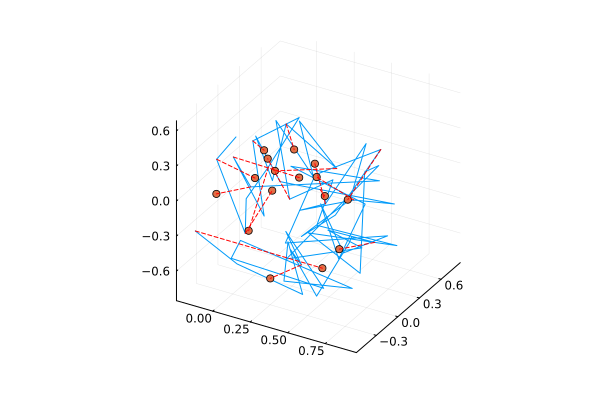

In [91]:
R,links,A=evolve_sliplink(R,links,A)
Q=plot3d(R[:,1],R[:,2],R[:,3],label=:none)
scatter!(A[:,1],A[:,2],A[:,3],label=:none)

for i in 1:length(links[:,1])
   plot3d!([R[links[i,1],1], A[i,1] ],[R[links[i,1],2], A[i,2]] ,[R[links[i,1],3], A[i,3] ],linecolor="red",label=nothing, linestyle = :dash)
end
Q

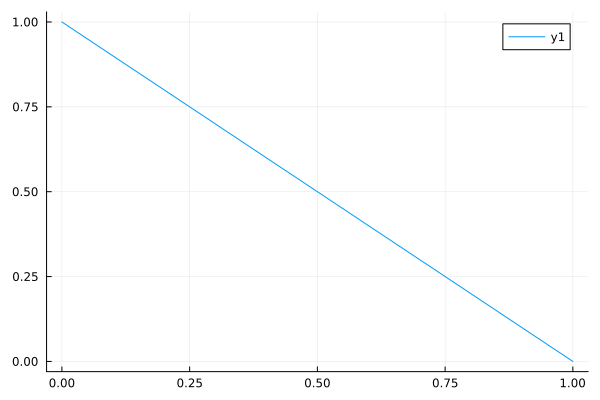

In [42]:
plot([0,1],[1,0])

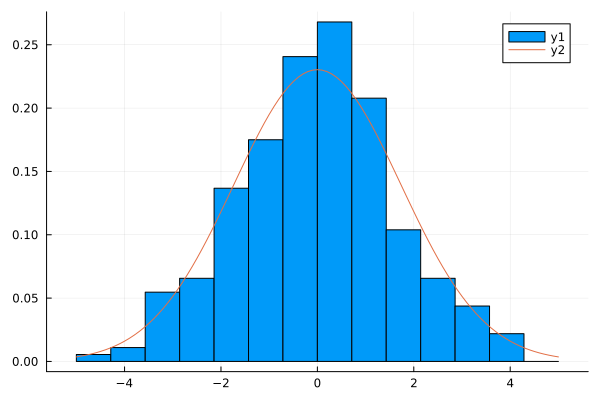

In [33]:
M=256
hist_endtoend=zeros(M,3)

for i in 1:M
    linkspolymer=make_chain_sliplink()
    R=linkspolymer[1]
    links=linkspolymer[2]
    A=linkspolymer[3]
    
    for j in 1:200
         R,links,A=evolve_sliplink(R,links,A)
    end 
    
    endtoend=(R[64,:]-R[1,:])
    hist_endtoend[i,:]=endtoend
end




histogram(hist_endtoend[:,2] ,normalize=:pdf,bins=range(-5,5,15))
x=-5:0.1:5
y=gauss.(x,sqrt(3))
plot!(x,y)

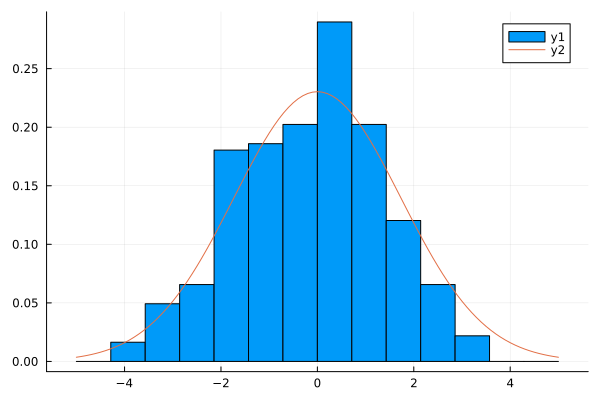

In [34]:
histogram(hist_endtoend[:,3] ,normalize=:pdf,bins=range(-5,5,15))
x=-5:0.1:5
y=gauss.(x,sqrt(3))
plot!(x,y)

In [26]:
N=64
T=400
M=128
g3=zeros(T)
g1=zeros(T)


for i in 1:M
    linkspolymer=make_chain_sliplink()
    R=linkspolymer[1]
    links=linkspolymer[2]
    A=linkspolymer[3]
    R0=make_chain(64)
    R=copy(R0)
    Rcm0=zeros(3)
    
    for o in 1:3    
        Rcm0[o]=1/N*sum(R0[:,o])  
    end    
        
    for j in 1:T
        Rcm=zeros(3)
        R,links,A=evolve_sliplink(R,links,A)
        
        for o in 1:3    
            Rcm[o]=1/N*sum(R[:,o])  
        end
        
        g3[j]+=1/M*norm(Rcm-Rcm0)^2
        
        for o in 1:64
            g1[j]+=1/M*1/N*norm(R[o,:]-R0[o,:])^2
        end 
    end

end

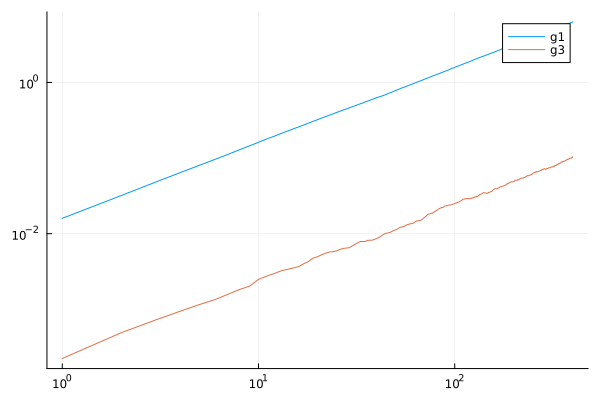

In [27]:
plot(g1,label=:"g1")
plot!(g3,label=:"g3")
plot!(yscale=:log10,xscale=:log10)
